In [1]:
"""
Template for week 5 project in Data Visualization

Create raster images using three types of dynamical systems
"""

import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Resource paths
PLOTS_PATH = "plots/"
DATA_PATH = "data/"


In [3]:
#######################################################################################
# Part 1 - Compute and plot Julia sets


def invert_fun(complex_fun, complex_val):
    """
    Input: np.poly1d object complex_fun and complex complex_val
    
    Output: List of n possible complex solutions to the equation complex_val = complex_fun(inv)
    The roots of complex_poly are the n possible values for complex_fun^(-1)(complex_val)
    """
    
    roots = np.roots(complex_fun - complex_val)
    sorted_roots = np.sort(roots)
    
    return sorted_roots.tolist()
    


In [4]:
def test_invert_fun():
    """ Test invert_fun """
    
    print(invert_fun(np.poly1d([1, -1]), 0))    
    print(invert_fun(np.poly1d([1, 2, 3]), 3))
    print(invert_fun(np.poly1d([1, 0, -4]), 0)) # Different answers between python 3.6 & 3.7
    print(invert_fun(np.poly1d([1, 2, 3], r=True), 0))
    print(invert_fun(np.poly1d([-3.0, 3, 0]), 0.3 + 0.2j))
    
test_invert_fun()

[1.0]
[-2.0, 0.0]
[-2.0000000000000004, 1.9999999999999996]
[1.0000000000000002, 1.999999999999998, 3.0000000000000018]
[(0.10367460967663507+0.08410597490646866j), (0.8963253903233641-0.08410597490646864j)]


Correct output
~~~~
[1.0]
[-2.0, 0.0]
[-2.0000000000000004, 1.9999999999999996]
[1.0000000000000002, 1.999999999999998, 3.0000000000000018]
[(0.10367460967663507+0.08410597490646866j), (0.8963253903233641-0.08410597490646864j)]
~~~~

In [5]:
def julia_set(lmbd, z_0, num_returned, num_dropped, seed=None):
    """
    Input: complex lmbd, z_0, integers num_returned, num_dropped,
    optional integer seed
    
    Output: List of complex numbers (starting with z_0)
    generated by Julia iteration with given lmbd
    """
    
    if seed:
        random.seed(seed)
    
    z_values = [z_0]
    
    for _ in range(num_returned + num_dropped):
        current_z = z_values[-1]
        poly = np.poly1d([-lmbd, lmbd, 0])
        chosen_inverse = random.choice(invert_fun(poly, current_z))
        z_values.append(chosen_inverse)

    return z_values[num_dropped:num_dropped+num_returned]
    

In [6]:
def test_julia_set():
    """ Test julia_set() """
    
    lmbd = 3
    z_0 = 0.3 + 0.2j
    print(julia_set(lmbd, z_0, 10, 0, 1))
    print()
    print(julia_set(lmbd, z_0, 10, 5, 1))
    print()
    lmbd = 2 + 1.0j
    z_0 = -0.2 + 0.3j
    print(julia_set(lmbd, z_0, 10, 0, 1))
    

test_julia_set()

[(0.3+0.2j), (0.10367460967663507+0.08410597490646866j), (0.034865585614995406+0.030136799279720974j), (0.9883481598313641-0.010285284747848681j), (0.493919787238025-0.28193324670511233j), (0.825820029026002+0.14421726801547266j), (0.6204943873886895-0.19947992480659082j), (0.7474326064736576+0.1343665033006527j), (0.6510840950633332-0.14822484926284196j), (0.28509105593250883-0.11495166779121475j)]

[(0.825820029026002+0.14421726801547266j), (0.6204943873886895-0.19947992480659082j), (0.7474326064736576+0.1343665033006527j), (0.6510840950633332-0.14822484926284196j), (0.28509105593250883-0.11495166779121475j), (0.10338550564224777-0.04830537353295625j), (0.9645841879521861+0.017329250107097124j), (0.489209610888019+0.26766489337960764j), (0.8251913075981272-0.13718329648096955j), (0.6163666227810709+0.19648144975250936j)]

[(-0.2+0.3j), (-0.04029949867157211+0.1480660267068451j), (0.008879610432771818+0.0685028679794222j), (0.9831674493944611-0.026517954735288757j), (0.264415995902002

Correct output
~~~~
[(0.3+0.2j), (0.10367460967663507+0.08410597490646866j), (0.034865585614995406+0.030136799279720974j), (0.9883481598313641-0.010285284747848681j), (0.493919787238025-0.28193324670511233j), (0.825820029026002+0.14421726801547266j), (0.6204943873886903-0.1994799248065906j), (0.7474326064736565+0.13436650330065267j), (0.6510840950633343-0.1482248492628413j), (0.2850910559325096-0.1149516677912147j)]

[(0.825820029026002+0.14421726801547266j), (0.6204943873886903-0.1994799248065906j), (0.7474326064736565+0.13436650330065267j), (0.6510840950633343-0.1482248492628413j), (0.2850910559325096-0.1149516677912147j), (0.10338550564224809-0.048305373532956275j), (0.9645841879521861+0.017329250107097138j), (0.48920961088801895+0.26766489337960764j), (0.8251913075981272-0.13718329648096955j), (0.6163666227810709+0.19648144975250936j)]

[(-0.2+0.3j), (-0.04029949867157211+0.1480660267068451j), (0.008879610432771818+0.0685028679794222j), (0.9831674493944611-0.026517954735288757j), (0.264415995902002-0.4398445313944147j), (1.028301113868141+0.2165630600915958j), (0.6266947571262833+0.4697708154503252j), (0.5969913338285733-0.3225513676585857j), (0.9095207479672998+0.3033043076110338j), (0.42851921689038075-0.4237672274528682j)]
~~~~

In [7]:
def plot_julia(julia_points, lmbd):
    """
    Input: List of complex numbers that lie on the Julia set for given lmbd
    
    Output: Scatter plot of complex number in list julia_points
    """
    
    x_val = [z.real for z in julia_points]
    y_val = [z.imag for z in julia_points]
    
    fig, axs = plt.subplots(figsize=(12, 8))
 
    axs.scatter(x_val, y_val, color='blue', marker='o', label='Julia Points')
    
    
    # Set title 
    axs.set_title(f'Julia Set for λ = {lmbd}', fontsize=14)
    axs.set_xlabel('Real Part', fontsize=12)
    axs.set_ylabel('Imaginary Part', fontsize=12)
    axs.legend()

    return fig

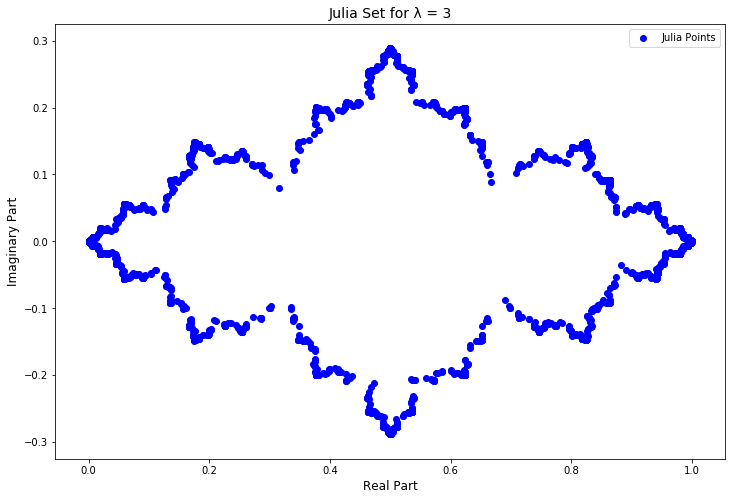

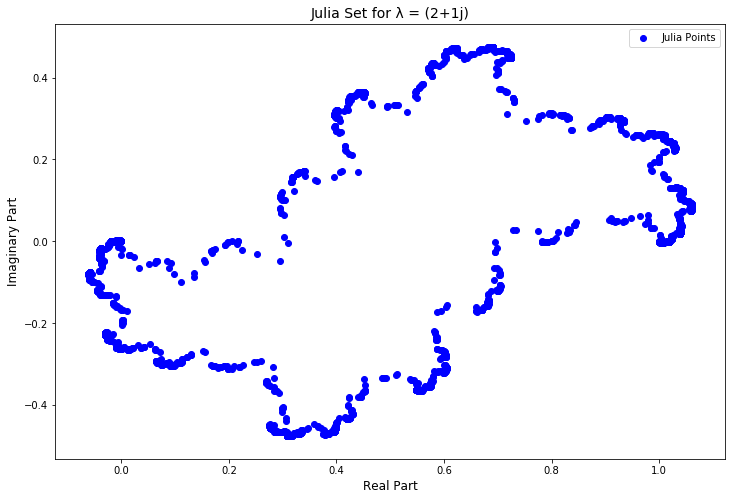

In [10]:
def test_plot_julia():
    """ Test plot_julia() """
    
    lmbd = 3
    z_0 = 0.2 + 0.3j
    julia_points = julia_set(lmbd, z_0, 2000, 20, 1)
    plot_julia(julia_points, lmbd)
    
    lmbd = 2 + 1.0j
    z_0 = 0.2 + 0.3j
    julia_points = julia_set(lmbd, z_0, 2000, 20, 1)
    plot_julia(julia_points, lmbd)

test_plot_julia()

In [8]:
##############################################################################
# Part 2 - Compute and plot Mandelbrot sets

MAX_ITERS = 20


def iterate_mandel(z_0):
    """
    Input: complex z_0
    
    Output: number of iterations for Mandelbrot function f(z) = z ** 2 + z_0 to diverge,
    maximum number of iterations is capped at MAX_ITERS
    """
    z_val = z_0
    for idx in range(MAX_ITERS):
        if abs(z_val) > 2:
            return idx
        z_val = z_val**2 + z_0
      
    return MAX_ITERS


In [9]:
def test_iter_mande1():
    """ Test iterate_mandel() """
    
    print(iterate_mandel(4))
    print(iterate_mandel(2))
    print(iterate_mandel(-2))
    print(iterate_mandel(1 + 1j))
    print(iterate_mandel(0.3 + 0.3j))
    print(iterate_mandel(0.3 - 0.3j))
    
test_iter_mande1()

0
1
20
1
20
20


Correct output
~~~~
0
1
20
1
20
20
~~~~

In [10]:
def mandel_table(real_values, imag_values):
    """
    Input: arrays real_values, imag_values of floats
    
    Output: 2D numpy array indicating number of iterations for
    divergence of Mandelbrot iteration initialized at
    corresponding complex values
    """
    real_grid, imag_grid = np.meshgrid(real_values, imag_values)
    res = np.zeros(real_grid.shape, dtype=int)

    for row in range(real_grid.shape[0]):
        for col in range(real_grid.shape[1]):
            z_0 = complex(real_grid[row, col], imag_grid[row, col])
            res[row, col] = iterate_mandel(z_0)
    
    return res

    

In [11]:
def test_mandel_table():
    """ Test mandel_table() """
    
    range1 = [-2.25, 0.75, -1.25, 1.25]
    range2 = [-1.5, -1.0, -0.1, 0.5]
    
    real_values = np.linspace(range1[0], range1[1], 7)
    imag_values = np.linspace(range1[2], range1[3], 8)
    print(mandel_table(real_values, imag_values))
    
    real_values = np.linspace(range2[0], range2[1], 11)
    imag_values = np.linspace(range2[2], range2[3], 11)
    print(mandel_table(real_values, imag_values))

test_mandel_table()

[[ 0  0  1  2  2  1  1]
 [ 0  1  2  3  8  3  1]
 [ 0  2  3  5 20 20  2]
 [ 0  3 16 18 20 20  2]
 [ 0  3 16 18 20 20  2]
 [ 0  2  3  5 20 20  2]
 [ 0  1  2  3  8  3  1]
 [ 0  0  1  2  2  1  1]]
[[ 6  7 11 12 13 20 20 20 20 20 20]
 [ 9 10 14 20 20 20 20 20 20 20 20]
 [10 15 20 20 20 20 20 20 20 20 20]
 [ 6  8 10 20 18 20 20 20 20 20 20]
 [ 5  6 11  8 10 14 20 20 20 20 20]
 [ 4  4  5  6  7 10 17 20 20 20 20]
 [ 4  4  4  5  6  8 12 20 20 20 20]
 [ 4  4  4  5  6 13 17 20  9 11 14]
 [ 3  3  4  5  6 20  7  6  6  7  7]
 [ 2  3  3  3  6  5  5  5  5  4  4]
 [ 2  2  2  2  3  3  4  4  4  4  4]]


Correct output
~~~~
[[ 0  0  1  2  2  1  1]
 [ 0  1  2  3  8  3  1]
 [ 0  2  3  5 20 20  2]
 [ 0  3 16 18 20 20  2]
 [ 0  3 16 18 20 20  2]
 [ 0  2  3  5 20 20  2]
 [ 0  1  2  3  8  3  1]
 [ 0  0  1  2  2  1  1]]
[[ 6  7 11 12 13 20 20 20 20 20 20]
 [ 9 10 14 20 20 20 20 20 20 20 20]
 [10 15 20 20 20 20 20 20 20 20 20]
 [ 6  8 10 20 18 20 20 20 20 20 20]
 [ 5  6 11  8 10 14 20 20 20 20 20]
 [ 4  4  5  6  7 10 17 20 20 20 20]
 [ 4  4  4  5  6  8 12 20 20 20 20]
 [ 4  4  4  5  6 13 17 20  9 11 14]
 [ 3  3  4  5  6 20  7  6  6  7  7]
 [ 2  3  3  3  6  5  5  5  5  4  4]
 [ 2  2  2  2  3  3  4  4  4  4  4]]
~~~~

In [14]:
def plot_mandelbrot(real_values, imag_values):
    """
    Input: lists (or numpy arrays) real_values and imag_values
    
    Output: matplotlib figure of image plot of mandel_table()
    applied to real_values, imag_values
    """
    mandel_data = mandel_table(real_values, imag_values)
    fig, axs = plt.subplots()
    img = axs.imshow(mandel_data, origin='lower', extent=[real_values.min(), real_values.max(), 
                                                          imag_values.min(), imag_values.max()])
    fig.colorbar(img)

    axs.set_title("Mandelbrot Set")
    axs.set_xlabel("Real Part")
    axs.set_ylabel("Imaginary Part")

    return fig

  

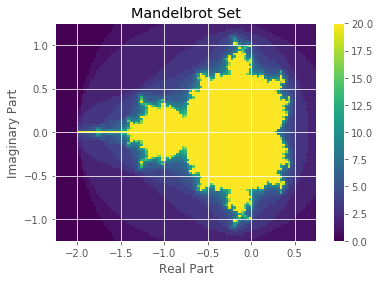

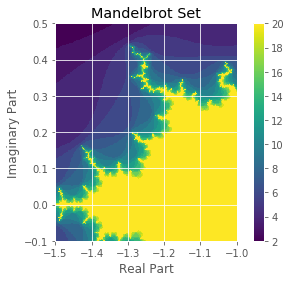

In [15]:
def test_plot_mandelbrot():
    """ Test plot_mandelbrot() """
    
    range1 = [-2.25, 0.75, -1.25, 1.25]
    range2 = [-1.5, -1.0, -0.1, 0.5]
    
    real_values = np.linspace(range1[0], range1[1], 101)
    imag_values = np.linspace(range1[2], range1[3], 101)
    plot_mandelbrot(real_values, imag_values)
    
    real_values = np.linspace(range2[0], range2[1], 301)
    imag_values = np.linspace(range2[2], range2[3], 301)
    plot_mandelbrot(real_values, imag_values)
    
test_plot_mandelbrot()

In [28]:
#########################################################################################
# Part 3 - Compute and plot Newton basins 

EPSILON = 0.000001

def newton_index(roots, z_0):
    """
    Input: List of complex roots, complex initial value z_0
    
    Output: Index of root in roots to which Newton iteration with initial
    value z_0 converges (with tolerance EPSILON)
    
    NOTE: If the iteration encounters a zero derivative, return len(roots)
    """
    z_k = z_0
    g_poly = np.poly1d(roots, True)  
    d_p = g_poly.deriv()  
    
    while True:  
        g_z = g_poly(z_k)
        dg_z = d_p(z_k)
        
        if abs(dg_z) <= EPSILON:
            return len(roots)
        
        if abs(g_z) <= EPSILON:
            distance = [abs(val - z_k) for val in roots]
            min_index = distance.index(min(distance))
            return min_index
        
        z_k = z_k - g_z / dg_z
     
    

In [29]:
def test_newton_index():
    """ Test newton_index() """
    
    z_0 = 0
    roots = [1]
    print(newton_index(roots, z_0))
    
    z_0 = 2
    roots = [-3, 4]
    print(newton_index(roots, z_0))
    
    z_0 = 0
    roots = [-2, 2]
    print(newton_index(roots, z_0))
    
    z_0 = 0.2 + 0.3j
    roots = [0.5 + 0.5j, 0.5 - 0.5j, -0.5 + 0.5j, -0.5 - 0.5j]
    print(newton_index(roots, z_0))
    
    z_0 = -0.2 - 0.3j
    roots = [0.5 + 0.5j, 0.5 - 0.5j, -0.5 + 0.5j, -0.5 - 0.5j]
    print(newton_index(roots, z_0))
    
    
test_newton_index()

0
1
2
0
3


Correct output
~~~~
0
1
2
0
3
~~~~

In [30]:
def newton_table(roots, real_values, imag_values):
    """
    Input: List of complex numbers roots, two lists of floats that define a grid
    of complex numbers
    
    Output:  2D numpy array of Newton indices where z_0 takes on values in
    the grid of complex numbers
    """
    rows, cols = len(imag_values), len(real_values)
    result = np.zeros((rows, cols), dtype=int)
    
    real_grid, imag_grid = np.meshgrid(real_values, imag_values)
    complex_values = real_grid + (imag_grid*1j)
    
    for row in range(rows):
        for col in range(cols):
            z_0 = complex_values[row][col]
            result[row][col] = newton_index(roots, z_0)
            
    return result


In [31]:
def test_newton_table():
    """ Test newton_table() """
    
    samples = 7
    roots = [0.5 + 0.5j, 0.5 - 0.5j, -0.5 + 0.5j, -0.5 - 0.5j]
    real_values = np.linspace(-1, 1, samples)
    imag_values = np.linspace(-1, 1, samples)
    print(newton_table(roots, real_values, imag_values))
    
    samples = 11
    roots = [-0.5j, 0.2 + 0.3j, -0.3 + 0.2j]
    real_values = np.linspace(-1, 1, samples)
    imag_values = np.linspace(-1, 1, samples)
    print(newton_table(roots, real_values, imag_values))
    
test_newton_table()

[[3 3 3 4 1 1 1]
 [3 3 3 4 1 1 1]
 [3 3 3 4 1 1 1]
 [4 4 4 4 4 4 4]
 [2 2 2 4 0 0 0]
 [2 2 2 4 0 0 0]
 [2 2 2 4 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0]
 [1 2 0 0 0 0 0 0 0 0 2]
 [2 2 1 1 0 0 0 0 2 1 2]
 [2 2 2 2 1 2 1 2 2 2 1]
 [2 2 2 2 2 2 1 1 1 1 1]
 [2 2 2 2 2 1 1 1 1 1 1]
 [2 2 2 2 2 1 1 1 1 1 1]
 [2 2 2 2 2 1 1 1 1 1 1]
 [2 2 2 2 2 1 1 1 1 1 1]
 [2 2 2 2 0 1 1 1 1 1 1]]


Correct output
~~~~
[[3 3 3 4 1 1 1]
 [3 3 3 4 1 1 1]
 [3 3 3 4 1 1 1]
 [4 4 4 4 4 4 4]
 [2 2 2 4 0 0 0]
 [2 2 2 4 0 0 0]
 [2 2 2 4 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0]
 [1 2 0 0 0 0 0 0 0 0 2]
 [2 2 1 1 0 0 0 0 2 1 2]
 [2 2 2 2 1 2 1 2 2 2 1]
 [2 2 2 2 2 2 1 1 1 1 1]
 [2 2 2 2 2 1 1 1 1 1 1]
 [2 2 2 2 2 1 1 1 1 1 1]
 [2 2 2 2 2 1 1 1 1 1 1]
 [2 2 2 2 2 1 1 1 1 1 1]
 [2 2 2 2 0 1 1 1 1 1 1]]
~~~~

In [36]:
#########################################################################################
# Student code for plotting Newton basins (peer-graded)

def plot_newton(roots, real_values, imag_values):
    """
    Input: List of complex numbers roots, two lists of floats that define a grid
    of complex numbers
    
    Output: matplotlib figure of mage plot of mandel_table()
    applied to roots, real_values, imag_values
    """
    
    
    newton_data = newton_table(roots, real_values, imag_values)
    fig, axs = plt.subplots()
    img = axs.imshow(newton_data, origin='lower', extent=[real_values.min(), real_values.max(), 
                                                          imag_values.min(), imag_values.max()])
    
    
    fig.colorbar(img)
    
    roots_real = [root.real for root in roots]
    roots_imag = [root.imag for root in roots]
    axs.scatter(roots_real, roots_imag, color='red', s=10) 
    

    axs.set_title(f"Newton Basins for {len(roots)} Roots")
    axs.set_xlabel("Real Part")
    axs.set_ylabel("Imaginary Part")
    


    return fig

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


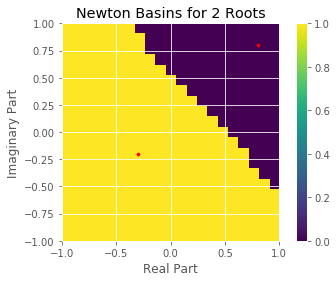

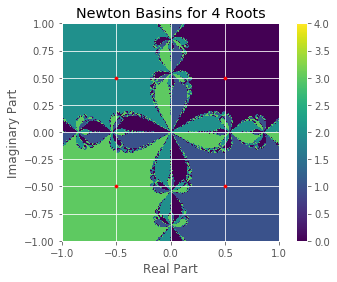

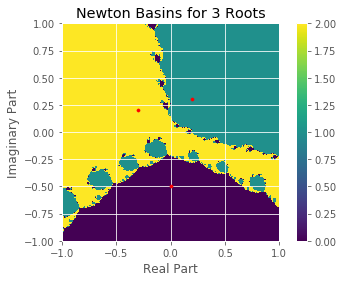

In [37]:
def test_plot_newton():
    """ Test plot_newton """
    
    # Simple test case - not required
    samples = 21
    roots = [0.801 + 0.8j, -0.298 - 0.202j]
    real_values = np.linspace(-1, 1, samples)
    imag_values = np.linspace(-1, 1, samples)
    print(newton_table(roots, real_values, imag_values))
    plot_newton(roots, real_values, imag_values)
    
    # Required test case
    samples = 301
    roots = [0.5 + 0.5j, 0.5 - 0.5j, -0.5 + 0.5j, -0.5 - 0.5j]
    real_values = np.linspace(-1, 1, samples)
    imag_values = np.linspace(-1, 1, samples)
    plot_newton(roots, real_values, imag_values)
    
    # Required test case
    roots = [-0.5j, 0.2 + 0.3j, -0.3 + 0.2j]
    real_values = np.linspace(-1, 1, samples)
    imag_values = np.linspace(-1, 1, samples)
    plot_newton(roots, real_values, imag_values)
    
    
test_plot_newton()